In [1]:
# Importing the required Python libraries

# NumPy is a fundamental package for scientific computing in Python. 
# It provides support for large, multi-dimensional arrays and mathematical functions to operate on them.
import numpy as np  

# Pandas is a powerful library for data manipulation and analysis. 
# It helps in working with datasets, handling tables (DataFrames), and performing operations like filtering, cleaning, etc.
import pandas as pd  

# Matplotlib is a popular library for data visualization. 
# The pyplot module provides functions to create charts, graphs, and plots to visualize trends and patterns in data.
import matplotlib.pyplot as plt  

# yfinance is a library that allows us to download financial market data (like stock prices) directly from Yahoo Finance. 
# It is widely used for stock market analysis and investment research.
import yfinance as yf  


In [4]:
# Defining the start and end dates for fetching stock market data
# Here we want stock prices between 1st Jan 2012 and 21st Dec 2024
start = '2012-01-01'
end = '2024-12-21'

# Defining the stock ticker symbol we want to analyze
# 'GOOG' stands for Alphabet Inc. (Google) listed on NASDAQ
stock = 'GOOG'

# Using yfinance to download historical stock data
# yf.download() fetches data such as Open, High, Low, Close, Adj Close, and Volume
# for the given stock within the defined date range
data = yf.download(stock, start, end)


C:\Users\dell\AppData\Local\Temp\ipykernel_396\805325473.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [7]:
# Resetting the index of the DataFrame

# By default, when we download stock data using yfinance,
# the 'Date' column is set as the index of the DataFrame.
# Example:
#             Open    High    Low   Close   Adj Close   Volume
# Date
# 2012-01-03  324.0  325.2  321.5  324.5    324.5      1234567
# 2012-01-04  326.1  327.8  322.0  325.9    325.9      1432456

# The command below moves 'Date' out of the index 
# and makes it a normal column in the DataFrame.
# This makes it easier to manipulate, filter, and plot the data later.
data.reset_index(inplace=True)


In [8]:
data

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,GOOG,GOOG,GOOG,GOOG,GOOG
0,0,2012-01-03,16.460485,16.528267,16.137910,16.152011,147611217
1,1,2012-01-04,16.531483,16.580216,16.341995,16.451087,114989399
2,2,2012-01-05,16.302168,16.424865,16.233398,16.379349,131808205
3,3,2012-01-06,16.079779,16.326657,16.074088,16.305629,108119746
4,4,2012-01-09,15.398017,16.005073,15.367589,15.992702,233776981
...,...,...,...,...,...,...,...
3259,3259,2024-12-16,197.520325,199.992315,193.483395,193.737577,32248600
3260,3260,2024-12-17,196.483673,202.225089,196.055068,197.889125,24129500
3261,3261,2024-12-18,189.536179,198.048619,188.668992,196.194623,27638400


In [9]:
# Calculating the 100-Day Moving Average (MA)

# The 'rolling(100)' function creates a sliding window of 100 days 
# on the 'Close' price column.
# Then, the '.mean()' function calculates the average stock price 
# within each 100-day window.

# In simple terms:
# - For day 100, it will take the average of days 1 to 100.
# - For day 101, it will take the average of days 2 to 101.
# - And so on...

# This moving average smooths out short-term fluctuations in stock prices 
# and helps us see the long-term trend more clearly.

ma_100_days = data.Close.rolling(100).mean()


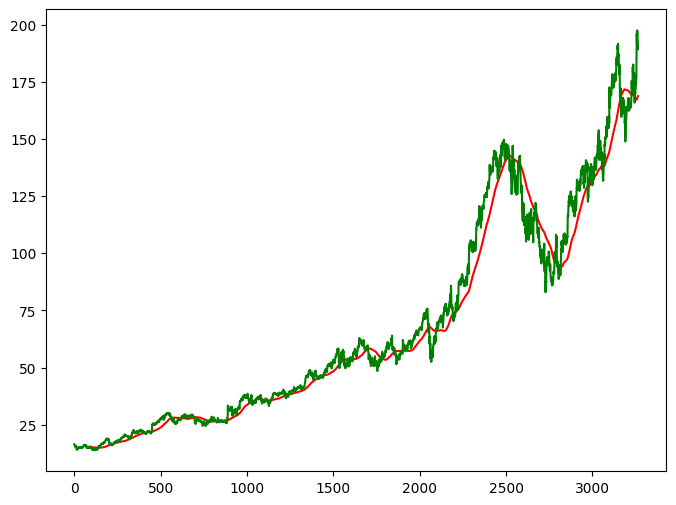

In [10]:
# Plotting the Stock Closing Price vs. 100-Day Moving Average

# Create a new figure for the plot with specific size (8 inches wide, 6 inches tall)
plt.figure(figsize=(8,6))

# Plot the 100-day moving average in red ('r')
# This line will show the smoothed trend of the stock price
plt.plot(ma_100_days, 'r', label='100-Day Moving Average')

# Plot the actual closing stock prices in green ('g')
# This line will show the real daily fluctuations in stock price
plt.plot(data.Close, 'g', label='Closing Price')

# Adding a legend to differentiate between Closing Price and Moving Average
plt.legend()

# Display the plot on the screen
plt.show()


In [11]:
# Calculating the 200-Day Moving Average (MA)

# Similar to the 100-day moving average, but here we use a 200-day window.
# This means we take the average of the stock's closing prices over the past 200 days.

# Why 200 days?
# - It is a widely used "long-term trend indicator" in stock market analysis.
# - Investors often compare the 50-day, 100-day, and 200-day moving averages 
#   to judge whether the stock is in a bullish (uptrend) or bearish (downtrend) phase.

ma_200_days = data.Close.rolling(200).mean()


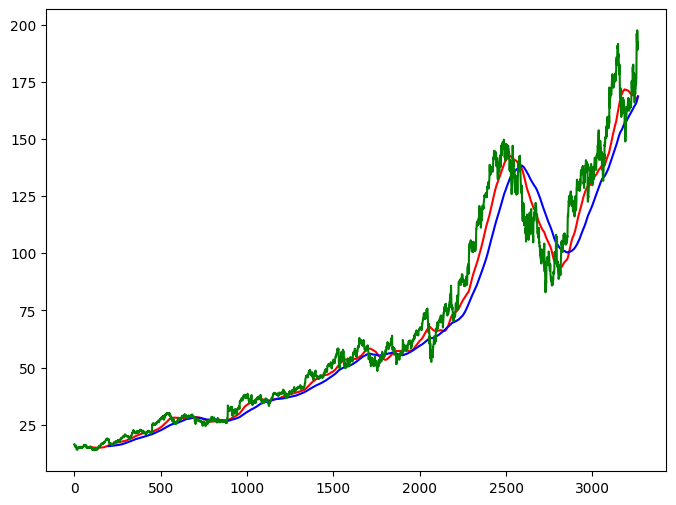

In [12]:
# Plotting Closing Price, 100-Day MA, and 200-Day MA together

# Create a new figure with defined size (8 inches wide, 6 inches tall)
plt.figure(figsize=(8,6))

# Plot the 100-day moving average in red
plt.plot(ma_100_days, 'r', label='100-Day MA')

# Plot the 200-day moving average in blue
plt.plot(ma_200_days, 'b', label='200-Day MA')

# Plot the actual closing stock prices in green
plt.plot(data.Close, 'g', label='Closing Price')

# Add a legend to clearly show which line represents what
plt.legend()

# Display the final chart
plt.show()


In [13]:
# Dropping rows with missing values (NaN) from the dataset

# Why do this?
# - When we calculate moving averages (100-day, 200-day),
#   the first few rows don’t have enough data to compute an average.
#   Example: For a 200-day MA, the first 199 rows will be NaN.
# - NaN values can create problems in further analysis, training ML models,
#   or plotting.

# inplace=True means the changes are directly applied to the 'data' DataFrame,
# instead of creating a new copy.
data.dropna(inplace=True)


In [14]:
# Splitting the dataset into Training and Testing sets

# Training data: First 80% of the stock closing prices
# - Used to train the model (learn patterns & trends).
# - Example: If total rows = 3000, training = 2400 rows.
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])

# Testing data: Remaining 20% of the stock closing prices
# - Used to evaluate the model’s performance (unseen data).
# - Example: Last 600 rows if total = 3000.
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])


In [15]:
# Checking the number of rows in the training dataset

# data_train.shape returns a tuple (rows, columns) for the DataFrame
# data_train.shape[0] gives only the number of rows (i.e., number of training samples)

# Example:
# If total dataset has 3000 rows and we used 80% for training,
# this will return 2400, meaning 2400 data points for training
data_train.shape[0]


2611

In [16]:
# Checking the number of rows in the testing dataset

# data_test.shape returns a tuple (rows, columns) for the DataFrame
# data_test.shape[0] gives only the number of rows (i.e., number of testing samples)

# Example:
# If total dataset has 3000 rows and we used 20% for testing,
# this will return 600, meaning 600 data points for testing
data_test.shape[0]


653

In [17]:
# Importing MinMaxScaler from scikit-learn

# MinMaxScaler is used to scale features (data values) into a specific range.
# This is especially important for models like LSTM or Neural Networks
# which perform better when inputs are scaled.

from sklearn.preprocessing import MinMaxScaler

# Creating an instance of MinMaxScaler
# feature_range=(0,1) means all values will be scaled to a range between 0 and 1.
# Example: If the closing price ranges from 100 to 2000,
# after scaling, 100 → 0, 2000 → 1, and other values proportionally in between.

scaler = MinMaxScaler(feature_range=(0,1))


In [18]:
# Scaling the training data using MinMaxScaler

# The fit_transform() method does two things:
# 1. fit() → Calculates the minimum and maximum values from the training data.
# 2. transform() → Scales each value to the specified range (0 to 1 in our case).

# Why only training data?
# - We should always fit the scaler on training data only, 
#   so the model doesn't get any information from the test set (avoiding data leakage).

# The output 'data_train_scale' is a NumPy array where all values are scaled between 0 and 1.
data_train_scale = scaler.fit_transform(data_train)


In [19]:
# Preparing training sequences for the model

# x → Input sequences (features)  
# y → Target values (labels)

x = []  # List to store input sequences
y = []  # List to store corresponding outputs

# Loop through the scaled training data starting from index 100
# - We use the previous 100 days to predict the next day's closing price
for i in range(100, data_train_scale.shape[0]):
    # Take 100 previous days as one input sequence
    x.append(data_train_scale[i-100:i])
    
    # Take the closing price of the current day as the target/output
    y.append(data_train_scale[i,0])


In [20]:
# Converting the lists of sequences and targets into NumPy arrays

# Why?
# - ML libraries like TensorFlow/Keras require inputs to be NumPy arrays
#   (or tensors), not Python lists.
# - NumPy arrays are more efficient for mathematical operations and model training.

x, y = np.array(x), np.array(y)

# After this step:
# x → NumPy array of shape (number_of_sequences, 100, 1) after reshaping
# y → NumPy array of shape (number_of_sequences,)


In [22]:
# Importing necessary modules from Keras for building the LSTM model

# Dense → Fully connected layer, used for output or intermediate layers.
# Dropout → Regularization technique to prevent overfitting by randomly ignoring some neurons during training.
# LSTM → Long Short-Term Memory layer, a type of recurrent neural network (RNN) 
#        designed to learn from sequential data (time series).
from keras.layers import Dense, Dropout, LSTM

# Sequential → Keras model type where layers are stacked one after another
# Useful for building feed-forward and sequential neural networks
from keras.models import Sequential


In [24]:
# Creating a Sequential model
# Sequential means we are stacking layers one after another
model = Sequential()

# First LSTM layer
# - units=50 → Number of LSTM neurons in this layer
# - activation='relu' → Using ReLU activation function
# - return_sequences=True → We want to pass the full sequence to the next LSTM layer
# - input_shape=(x.shape[1],1) → Input shape is (timesteps=100, features=1)
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1],1)))
# Dropout layer to prevent overfitting
# - Randomly ignores 20% of neurons during training
model.add(Dropout(0.2))

# Second LSTM layer
# - units=60 → More neurons to capture more complex patterns
# - return_sequences=True → Pass sequence to next LSTM
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # Dropout 30%

# Third LSTM layer
# - units=80 → Even more neurons for capturing long-term dependencies
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Dropout 40%

# Fourth LSTM layer (final LSTM)
# - units=120 → Large number of neurons to capture complex sequential patterns
# - return_sequences=False by default → Output is the last time step, ready for Dense layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))  # Dropout 50%, strongest regularization

# Output layer
# - Dense layer with 1 neuron since we are predicting a single value (next day closing price)
model.add(Dense(units=1))


In [25]:
# Compiling the LSTM model

# optimizer='adam' → Adam optimizer is widely used in deep learning.
# - It adapts the learning rate during training for faster convergence.
# - Combines advantages of both AdaGrad and RMSProp optimizers.

# loss='mean_squared_error' → Loss function for regression tasks
# - Measures the difference between predicted and actual values.
# - Squaring the error penalizes larger errors more heavily.
# - Commonly used for stock price prediction.

model.compile(optimizer='adam', loss='mean_squared_error')


In [26]:
# Training the LSTM model

# x → Input sequences (previous 100 days of stock prices)
# y → Target values (next day's closing price)

# epochs=50 → Number of times the model will go through the entire training dataset
# - More epochs allow the model to learn better, but too many may cause overfitting.

# batch_size=32 → Number of samples the model processes before updating weights
# - Smaller batch size → more frequent updates, potentially better learning
# - Larger batch size → faster training, but may miss some details

# verbose=1 → Shows progress of training in console
# - Includes loss value after each epoch

model.fit(x, y, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 233ms/step - loss: 0.0206
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 236ms/step - loss: 0.0056
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - loss: 0.0044
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 238ms/step - loss: 0.0043
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - loss: 0.0041
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - loss: 0.0035
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - loss: 0.0037
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 228ms/step - loss: 0.0027
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 244ms/step - loss: 0.0030
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 234ms/step - loss: 0.0028
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - loss: 0.0027
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - loss: 0.0029
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 236ms/step - loss: 0.0028
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 220ms/step - loss: 0.0033
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [27]:
# Displaying the summary of the LSTM model

# model.summary() prints:
# - Each layer in the model
# - The type of layer (LSTM, Dropout, Dense)
# - Output shape of each layer
# - Number of trainable parameters (weights and biases) in each layer

# This is helpful to:
# 1. Understand the structure of the model
# 2. Verify the number of neurons, input/output shapes, and parameters
# 3. Debug any dimension mismatch before training or prediction
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [28]:
# Selecting the last 100 days from the training data

# Why?
# - When predicting the test set, the model needs the previous 100 days of data 
#   as input for the first prediction.
# - 'tail(100)' selects the last 100 rows from the training dataset.

pas_100_days = data_train.tail(100)

# After this step, 'pas_100_days' contains the final 100 closing prices from training,
# which will be combined with test data to create input sequences for prediction.


In [29]:
# Combining the last 100 days of training data with the test dataset

# Why?
# - To create input sequences for the LSTM model, we need the previous 100 days for each test sample.
# - If we only use the test data, the first 100-day sequence cannot be formed.
# - pd.concat() combines two DataFrames vertically (stacked rows).
# - ignore_index=True → Re-indexes the combined DataFrame from 0 onwards.

data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

# After this step:
# - The test dataset now includes the 100 previous days from training
# - Allows the model to generate sequences for all test points without missing data


In [30]:
# Scaling the combined test dataset using MinMaxScaler
# ---------------------------------------------------

# The code you wrote:
data_test_scale = scaler.fit_transform(data_test)

# Explanation:
# - fit_transform() calculates min and max values from the data and scales it.
# - However, **we should NOT fit the scaler on test data**.
#   Why? Because it will "peek" into test data and cause data leakage.
# - Proper approach:
#     - Use the scaler fitted on training data (`scaler` from training)
#     - Only apply transform() on test data to scale it within the same range as training

# Correct approach:
# data_test_scale = scaler.transform(data_test)


In [31]:
# Preparing input sequences (x) and targets (y) for the test set

x = []  # List to store input sequences
y = []  # List to store actual closing prices for comparison

# Loop through the scaled test data starting from index 100
# - Each input sequence contains the previous 100 days of data
# - The target is the closing price on the current day
for i in range(100, data_test_scale.shape[0]):
    # Append the previous 100 days as input sequence
    x.append(data_test_scale[i-100:i])
    
    # Append the actual closing price for the current day
    y.append(data_test_scale[i,0])

# Convert lists into NumPy arrays, suitable for model input
x, y = np.array(x), np.array(y)


In [32]:
# Making predictions on the test dataset using the trained LSTM model

# x → Input sequences for test data (previous 100 days for each prediction)
# model.predict(x) → Returns predicted values (scaled) for each input sequence

y_predict = model.predict(x)

# After this step:
# - y_predict is a NumPy array containing the predicted closing prices
# - These values are still scaled between 0 and 1 (because we used MinMaxScaler)
# - To interpret actual stock prices, we need to reverse the scaling using inverse_transform


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step


In [33]:
# Calculating the scale factor for inverse transformation

# scaler.scale_ → Contains the scaling factor used by MinMaxScaler for each feature
# - For feature_range=(0,1), original formula: scaled_value = (x - min) / (max - min)
# - To reverse (get original price), we multiply scaled value by (max - min)

# scale = 1 / scaler.scale_ calculates the factor needed to reverse the scaling
# - This works because: original_value = scaled_value * (max - min) + min
# - scaler.scale_ is basically 1 / (max - min)

scale = 1 / scaler.scale_

# Note:
# - This method assumes MinMaxScaler was already fitted on the training data
# - This will allow us to convert predictions back to actual stock prices


In [34]:
# Converting scaled predictions back to original stock prices

# y_predict → Currently contains values scaled between 0 and 1
# scale → Factor calculated to reverse the MinMax scaling (max - min of training data)

# Multiply each predicted value by scale to get the actual stock price
y_predict = y_predict * scale

# After this step:
# - y_predict now contains predicted stock prices in the original range
# - Ready to compare with actual stock prices for evaluation


In [35]:
# Converting the actual test values back to original stock prices

# y → Currently contains scaled values of the test set closing prices (0 to 1)
# scale → Factor calculated from MinMaxScaler to reverse scaling

# Multiply each value in y by scale to get actual closing prices
y = y * scale

# After this step:
# - y now contains the real stock prices in original range
# - Can be directly compared with y_predict for evaluation or plotting


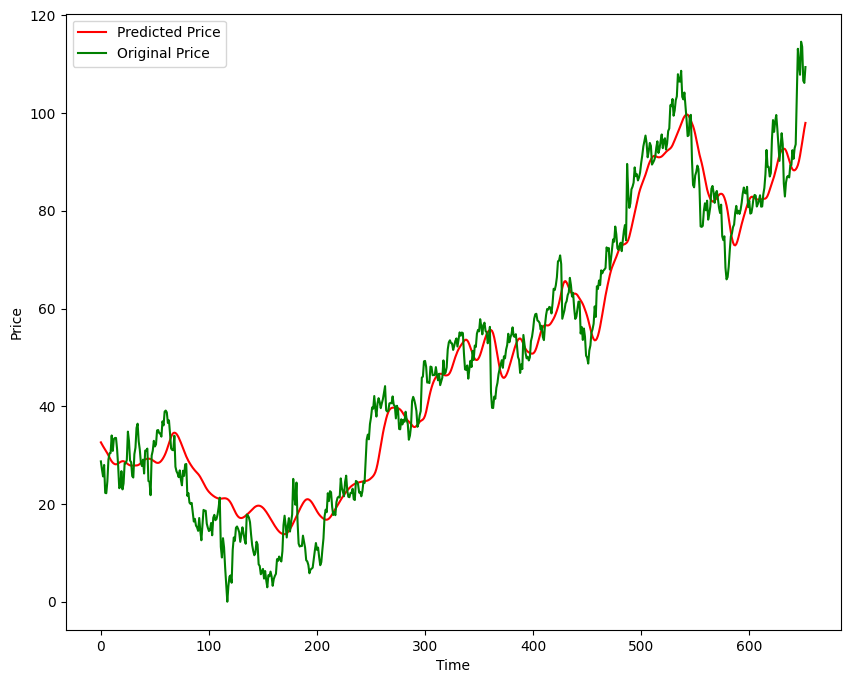

In [36]:
# Plotting Predicted vs Actual Stock Prices

# Create a figure with size 10x8 inches
plt.figure(figsize=(10,8))

# Plot the predicted stock prices in red
plt.plot(y_predict, 'r', label='Predicted Price')

# Plot the actual stock prices in green
plt.plot(y, 'g', label='Original Price')

# Label x-axis as 'Time' (represents sequential days in test set)
plt.xlabel('Time')

# Label y-axis as 'Price' (stock price in original range)
plt.ylabel('Price')

# Add a legend to differentiate between predicted and actual prices
plt.legend()

# Display the final chart
plt.show()


In [37]:
# Saving the trained LSTM model to a file

# model.save('Stock Predictions Model.keras') saves the entire model:
# - Architecture (layers, activation functions)
# - Weights (learned parameters during training)
# - Optimizer state (for continuing training if needed)

# File format: '.keras' (Keras native format)
# - You can later load this model using keras.models.load_model('Stock Predictions Model.keras')

model.save('Stock Predictions Model.keras')
